In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load Our Dataset

In [2]:
df = pd.read_csv('berat_tinggi.csv')

## EDA

Text(0.5, 1.0, 'Sebaran Nilai berat vs tinggi')

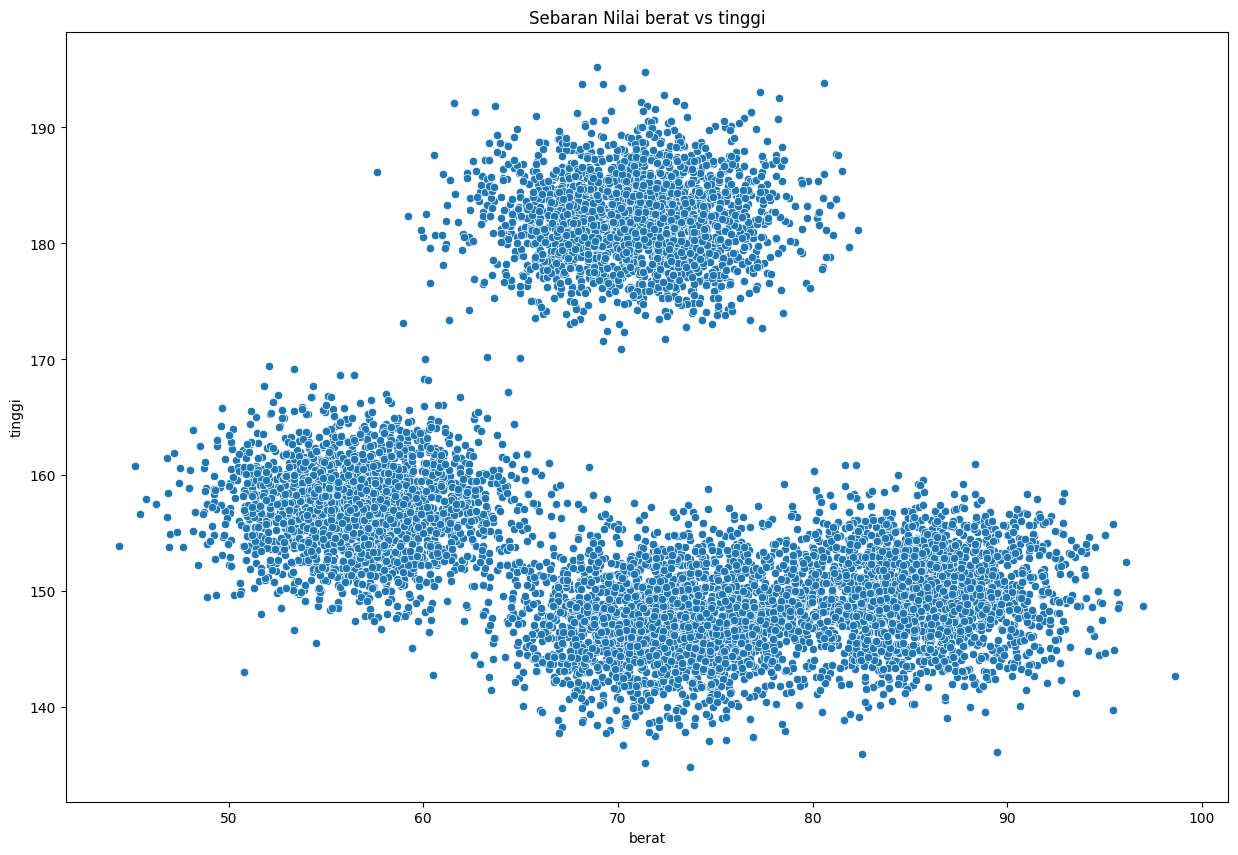

In [3]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df, x='berat', y='tinggi')
plt.title('Sebaran Nilai berat vs tinggi')

In [4]:
df.describe()

,tinggi,berat
count,8888.000000,8888.000000
mean,159.125498,71.365302
std,14.258305,10.729120
min,134.881305,44.344643
25%,148.522565,63.557079
50%,153.805704,71.748643
75%,170.365514,79.003827
max,195.232920,98.644868


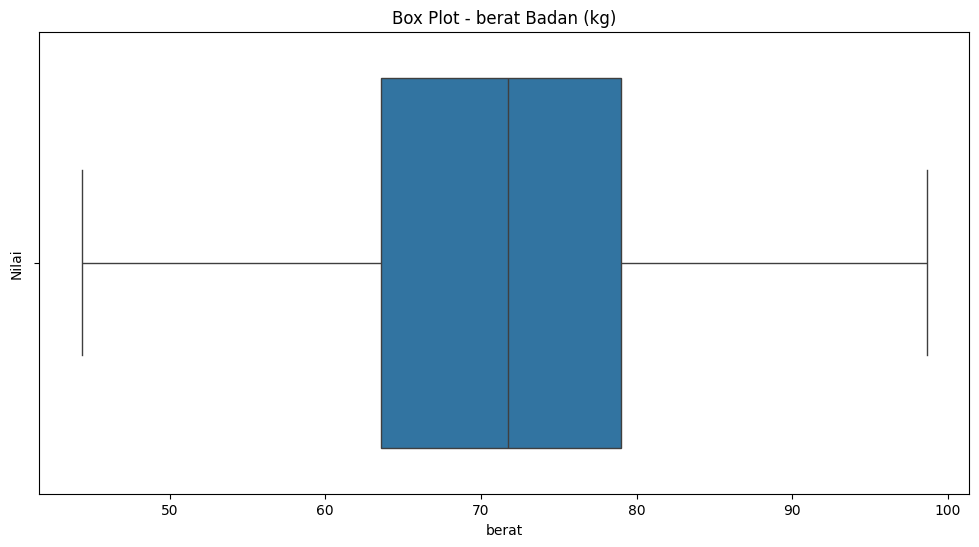

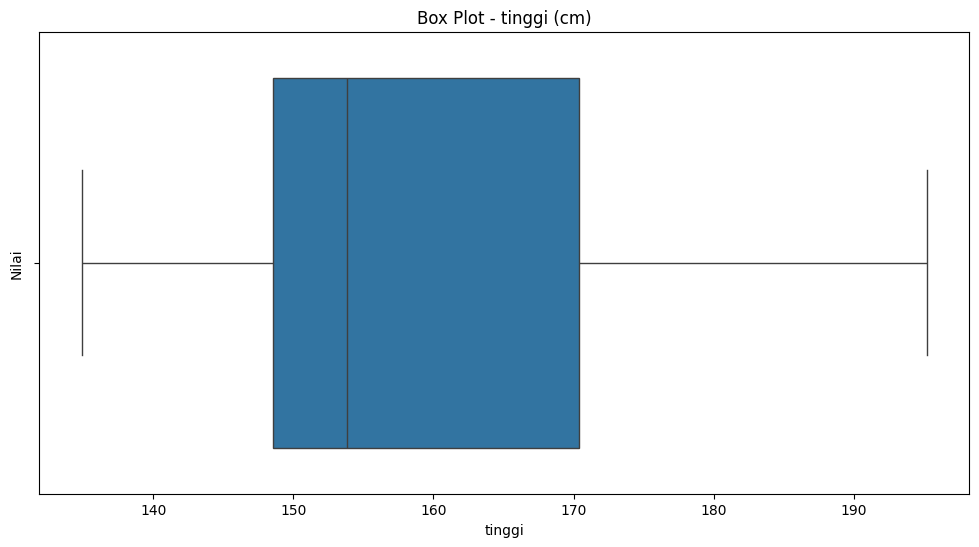

In [5]:
# Looping untuk kolom 'berat' dan 'tinggi'
columns = ['berat', 'tinggi']

for col in columns:
    # Box plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=col, data=df)
    plt.title(f'Box Plot - {col} Badan (kg)' if col == 'berat' else f'Box Plot - {col} (cm)')
    plt.xlabel(col)
    plt.ylabel('Nilai')
    plt.show()

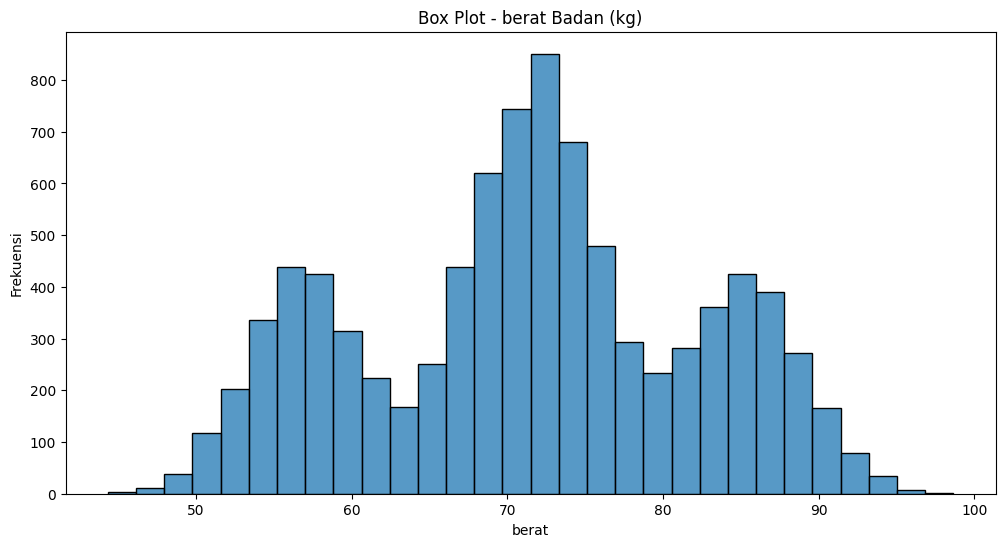

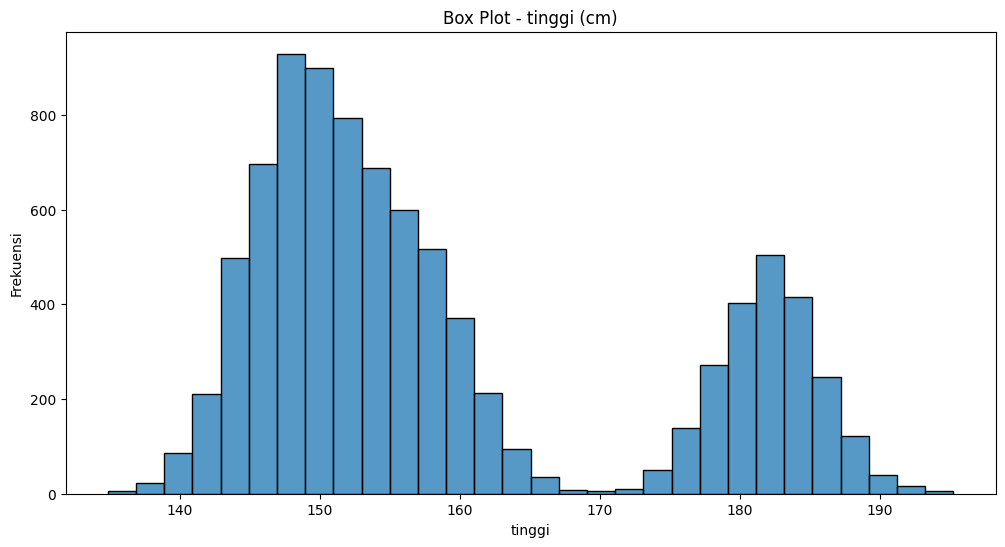

In [6]:
for col in columns:
    # Histogram
    plt.figure(figsize=(12, 6))
    sns.histplot(df[col], bins=30, kde=False)
    plt.title(f'Box Plot - {col} Badan (kg)' if col == 'berat' else f'Box Plot - {col} (cm)')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

## Feature Engineering
* Unsupervised tidak perlu dilakukan splitting
1. Drop Duplikat
2. Outlier Handling (opsional)-> pada step ini tidak perlu, karena berat dan tinggi masih wajar untuk nilai seperti itu
3. Feature Scalling

In [7]:
# Drop Duplicates

print(f"Dataframe dimension before duplication drop {df.shape[0]}")

df = df.drop_duplicates().reset_index(drop=True)

print(f"Dataframe dimension after duplication drop {df.shape[0]}")

Dataframe dimension before duplication drop 8888
Dataframe dimension after duplication drop 8888


dari hasil running program diatas, tidak ada data yg duplikat

In [8]:
fitur_columns = ['berat', 'tinggi']
X = df[fitur_columns].values
y = df['deskripsi'].values #anotator label

In [9]:
# Feature Scalling
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
df_scalling = pd.DataFrame(data = X_std, columns = fitur_columns )
df_scalling.describe()

,berat,tinggi
count,8.888000e+03,8.888000e+03
mean,3.785351e-16,-1.893375e-15
std,1.000056e+00,1.000056e+00
min,-2.518583e+00,-1.700451e+00
25%,-7.278008e-01,-7.436739e-01
50%,3.573103e-02,-3.731224e-01
75%,7.119833e-01,7.883579e-01
max,2.542716e+00,2.532521e+00


In [10]:
X_std

array([[-1.2118229 , -0.07092171],
       [-1.75281897,  0.08546572],
       [-0.87900786,  0.16556767],
       ...,
       [-0.89346332, -0.02015625],
       [-1.6141688 , -0.17762697],
       [ 1.40264032, -0.3111536 ]])

In [11]:
df_scalling

,berat,tinggi
0,-1.211823,-0.070922
1,-1.752819,0.085466
2,-0.879008,0.165568
3,-0.216544,1.636598
4,-0.002258,1.777105
...,...,...
8883,0.329937,1.274490
8884,0.905892,-0.527475
8885,-0.893463,-0.020156
8886,-1.614169,-0.177627


## TO DO!
- Lengkapi Code dibawah ini, untuk mengecek distribusi sebelum dan setelah dilakukan feature scalling menggunakan standar scaller

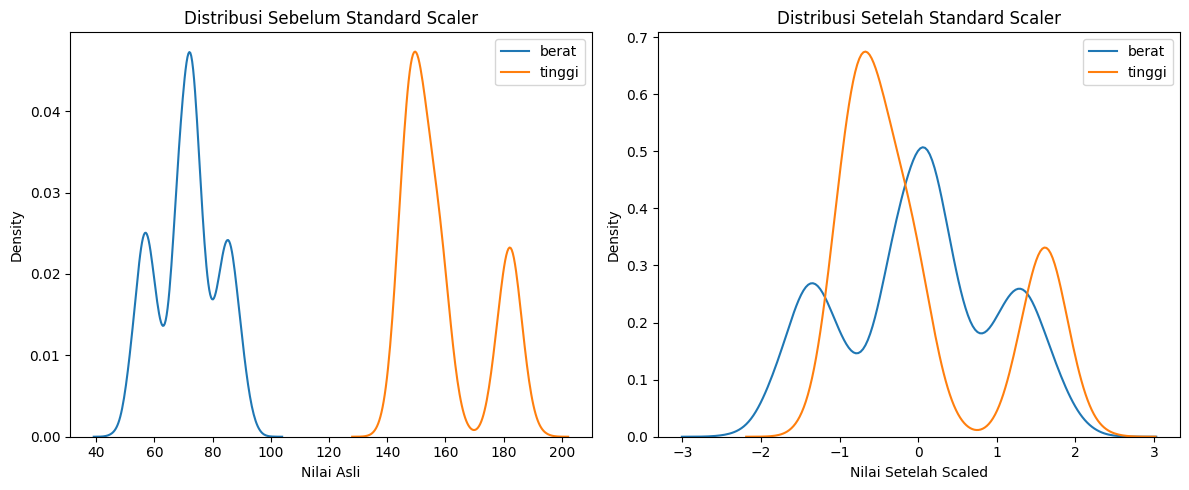

In [14]:
# Contoh data
# Misal X adalah DataFrame
# X = pd.DataFrame({...})
# Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Use the fitur_columns list to set the column names of the new DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=fitur_columns)

# Plot distribusi sebelum dan sesudah StandardScaler
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot distribusi sebelum Standar Scaler
# Loop through the columns in the original DataFrame (before converting to numpy)
# Or use the fitur_columns list as we did when creating X_scaled_df
for col in fitur_columns:
    sns.kdeplot(df[col], ax=ax1, label=col) # Plotting from the original df for "before" scaling
ax1.set_title('Distribusi Sebelum Standard Scaler')

# Plot distribusi setelah Standar Scaler
for col in X_scaled_df.columns:
    sns.kdeplot(X_scaled_df[col], ax=ax2, label=col)
ax2.set_title('Distribusi Setelah Standard Scaler')

# Set x-labels
ax1.set_xlabel('Nilai Asli')
ax2.set_xlabel('Nilai Setelah Scaled')

# Menampilkan legenda
ax1.legend()
ax2.legend()

plt.tight_layout()
plt.show()

### Tulis Interpretasi dari hasil evaluasi diatas :
### Isi disini
1.  Sebelum *Standard Scaler*, distribusi kolom 'berat' dan 'tinggi' memiliki rentang nilai yang berbeda dan terlihat terpusat di sekitar nilai rata-rata masing-masing kolom. Distribusi ini memiliki bentuk yang mirip dengan distribusi normal (gaussian-like).
2.  Setelah *Standard Scaler*, distribusi kedua kolom ('berat' dan 'tinggi') telah diubah. Rentang nilai sekarang terpusat di sekitar 0 dan memiliki standar deviasi sekitar 1. Bentuk distribusi relatif tetap sama seperti sebelumnya, namun skalanya telah dinormalisasi. Ini penting dalam banyak algoritma *machine learning* (terutama yang berbasis jarak) karena memastikan bahwa fitur-fitur dengan skala yang berbeda tidak mendominasi proses perhitungan.

## K-means Clustering
Pada pembahasan kali ini akan diuji 2 metode pemilihan nilai cluster (K) yang terbaik, mendekati distribusi pada label anotator.
1. Metode Elbow
2. Via-Score plot

### Metode Elbow

Text(0, 0.5, 'Intertia / WSS')

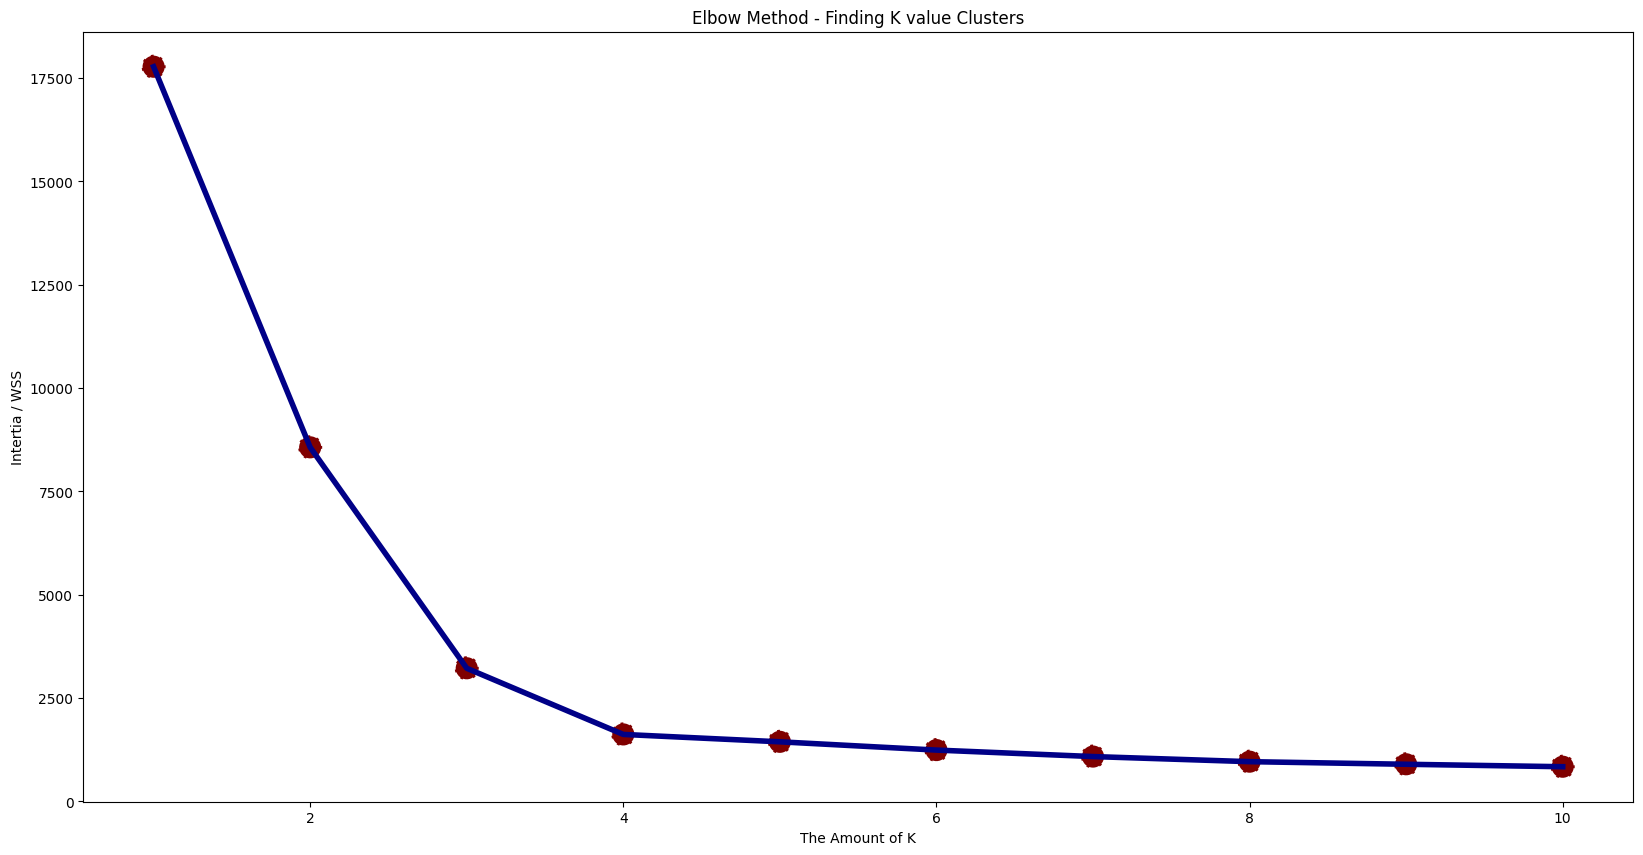

In [15]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_scalling.values)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))

sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.title('Elbow Method - Finding K value Clusters')
plt.xlabel('The Amount of K')
plt.ylabel('Intertia / WSS')

In [16]:
#Dari hasil diatas elbow nya dipilih pada angka 4,
# karena titik awal sebelum titik selanjutnya memiliki gap yang konstan atau
# titik setelah lekukan tajam sebelum mendatar
from sklearn.cluster import KMeans
kmeans_elbow = KMeans(n_clusters=4, random_state=0)
kmeans_elbow.fit(df_scalling.values)

KMeans(n_clusters=4, random_state=0)

In [17]:
#taruh hasil k-means elbow method ke df dengan nama kolom cluster_elbow
df['cluster_elbow'] = kmeans_elbow.labels_

In [18]:
df

,tinggi,berat,deskripsi,cluster_elbow
0,158.114332,58.364240,Normal,0
1,160.344026,52.560155,Normal,0
2,161.486080,61.934852,Normal,0
3,182.459297,69.042108,Slim,2
4,184.462584,71.341076,Slim,2
...,...,...,...,...
8883,177.296550,74.905033,Slim,2
8884,151.605026,81.084183,Obese,3
8885,158.838120,61.779766,Normal,0
8886,156.592981,54.047666,Normal,0


<Axes: xlabel='berat', ylabel='tinggi'>

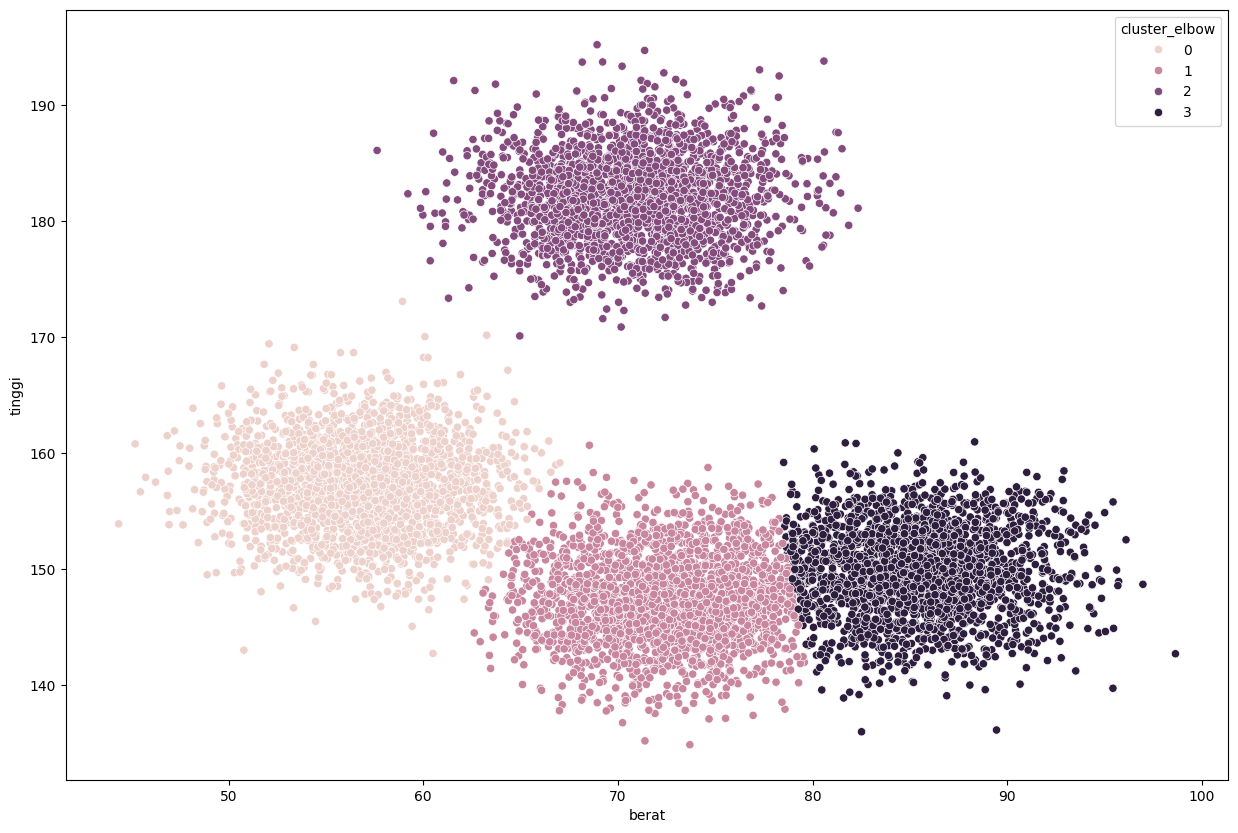

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df, x='berat', y='tinggi', hue='cluster_elbow')

### Bandingkan hasil dengan label anotator

<Axes: xlabel='berat', ylabel='tinggi'>

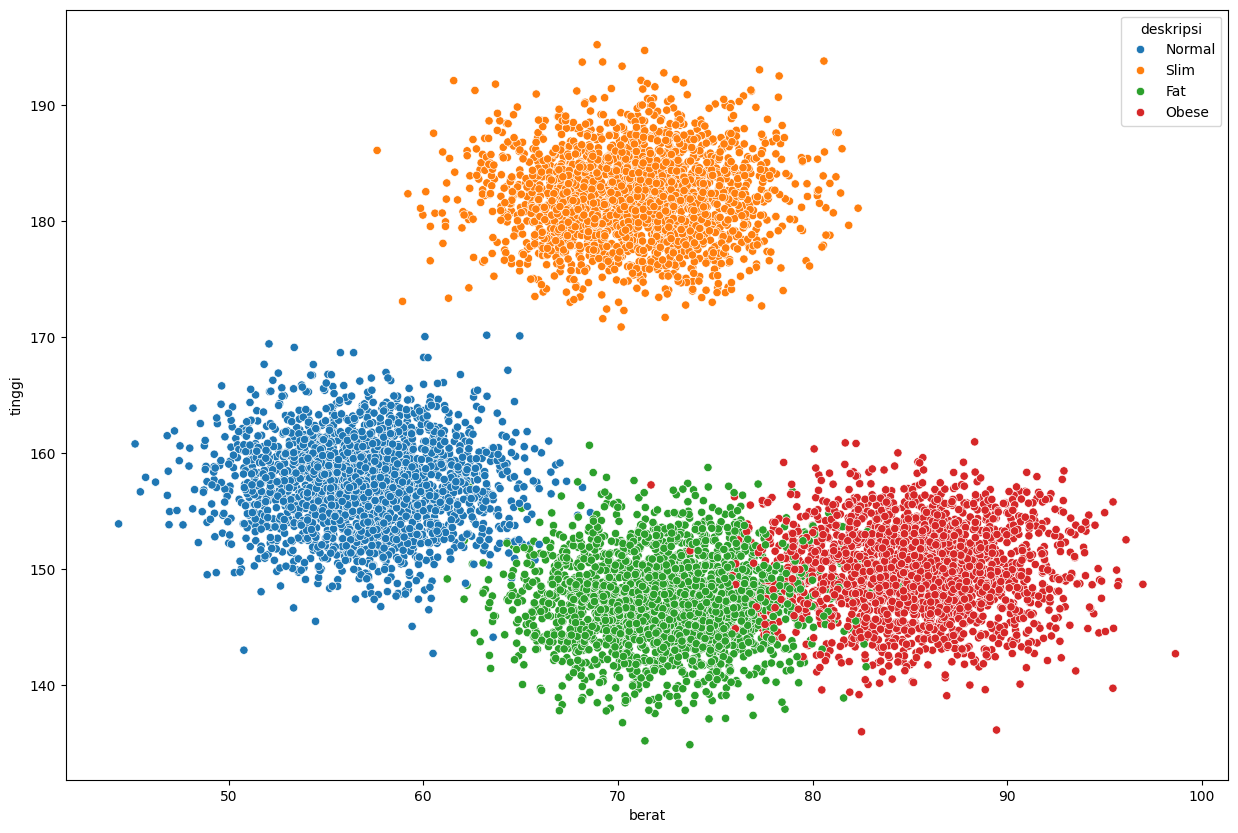

In [20]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df, x='berat', y='tinggi',hue='deskripsi')

### Hasil diatas ketika menggunakan elbow ialah optimal, karena cluster cocok dengan label anotator yang telah tersedia di deskripsi. Dengan kondisi :
1. Cluster 0 -> Normal
2. Cluster 1 -> Fat
3. Cluster 2 -> Slim
4. Cluster 3 -> Obese

### 2. Via Score Plot

In [21]:
!pip install yellowbrick

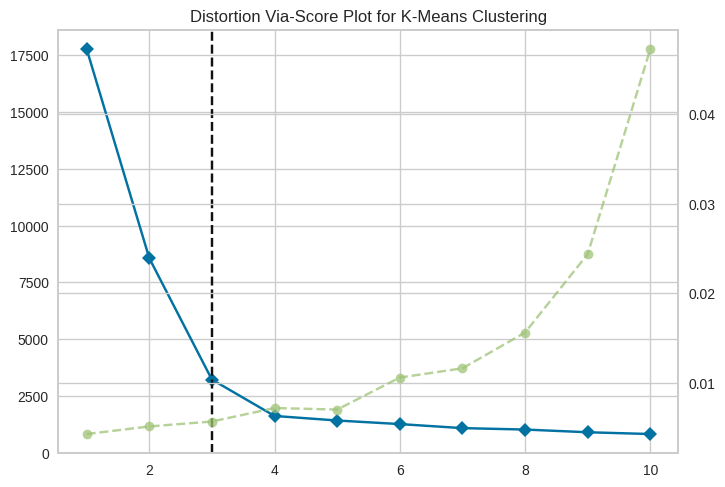

In [22]:
# Via Score Plot
from yellowbrick.cluster import KElbowVisualizer
k_means_via = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(k_means_via, k=(1,11), timings= True)
visualizer.fit(df_scalling.values)        # Fit the data to the visualizer
plt.title('Distortion Via-Score Plot for K-Means Clustering')
plt.show()

In [23]:
# Dari hasil diatas K-nya dipilih pada angka 3,
# karena titik distorsinya bertemu pada nilai 3 di sumbu x
from sklearn.cluster import KMeans
kmeans_via = KMeans(n_clusters=3, random_state=0)
kmeans_via.fit(df_scalling.values)

KMeans(n_clusters=3, random_state=0)

In [24]:
#taruh hasil k-means via score method ke df dengan nama kolom cluster_via
df['cluster_via'] = kmeans_via.labels_

In [25]:
df

,tinggi,berat,deskripsi,cluster_elbow,cluster_via
0,158.114332,58.364240,Normal,0,0
1,160.344026,52.560155,Normal,0,0
2,161.486080,61.934852,Normal,0,0
3,182.459297,69.042108,Slim,2,2
4,184.462584,71.341076,Slim,2,2
...,...,...,...,...,...
8883,177.296550,74.905033,Slim,2,2
8884,151.605026,81.084183,Obese,3,1
8885,158.838120,61.779766,Normal,0,0
8886,156.592981,54.047666,Normal,0,0


## TO DO !
- Lakukan evaluasi pada k-means menggunakan via score secara visualisasi

<Axes: xlabel='berat', ylabel='tinggi'>

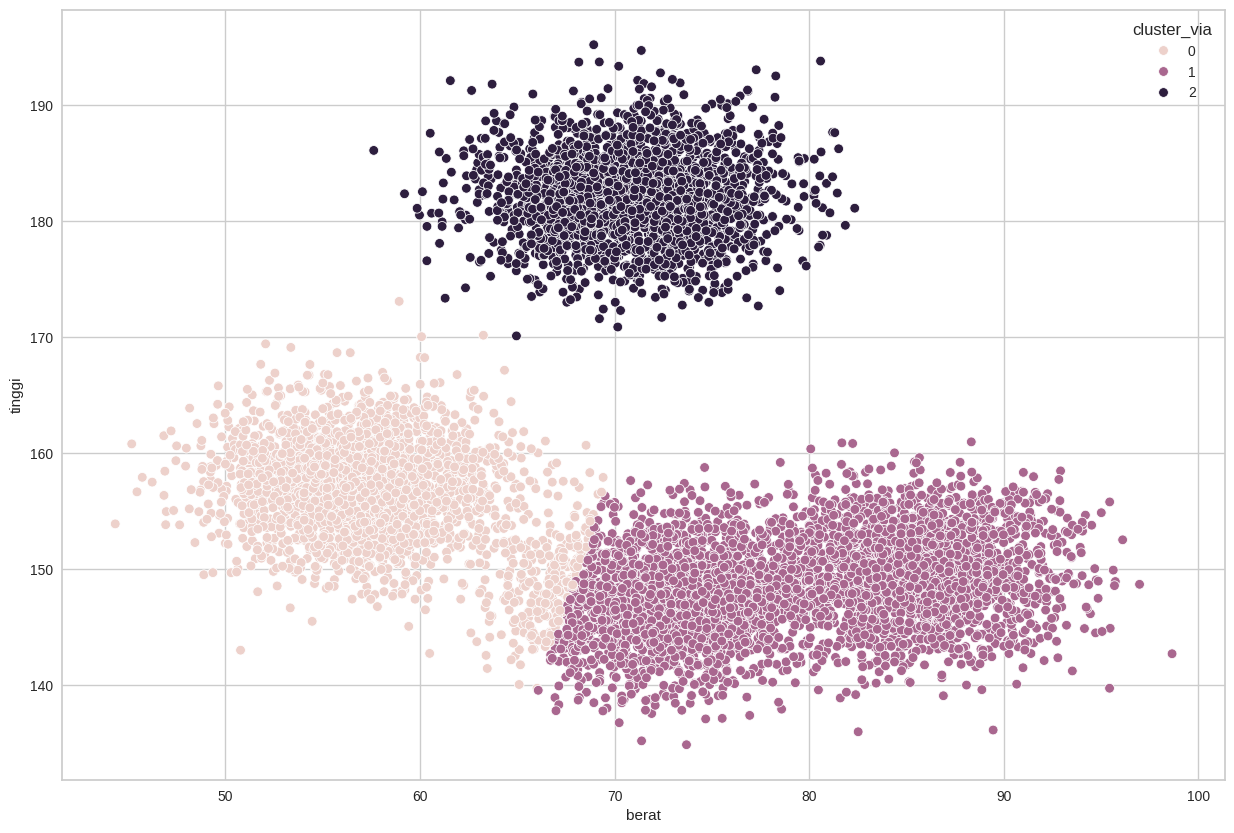

In [27]:
#Lakukan evaluasi setelah dilakukan K-Means
#Bandingkan hasil cluster dengan distribusi data asli
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df, x='berat', y='tinggi', hue='cluster_via') # Pass the DataFrame and relevant columns to scatterplot

### Bandingkan dengan label anotator

<Axes: xlabel='berat', ylabel='tinggi'>

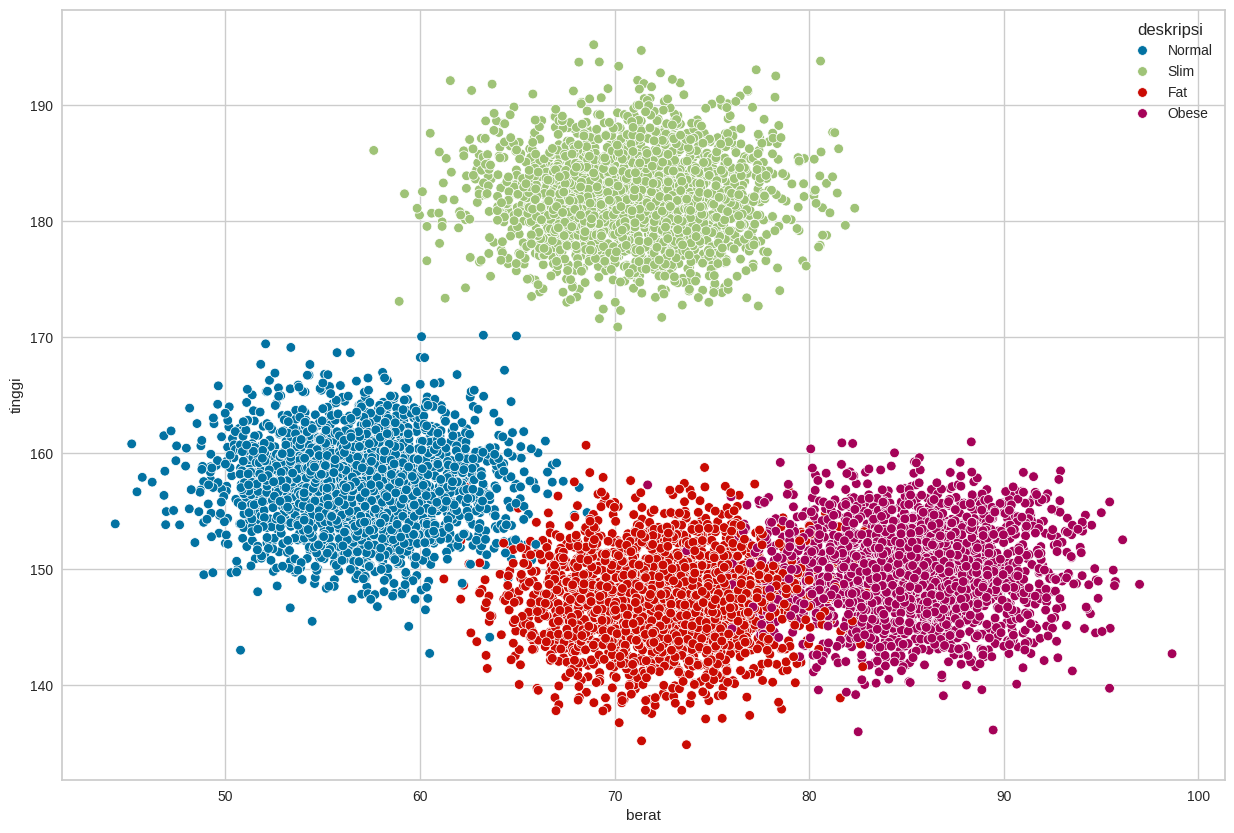

In [29]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df, x='berat', y='tinggi', hue='deskripsi')

### Tulis Interpretasi dari hasil evaluasi diatas :
### Isi disini
1. Visualisasi hasil K-Means dengan 3 cluster (metode Via Score Plot) menunjukkan bahwa data dikelompokkan menjadi tiga area yang berbeda di plot sebaran 'berat' vs 'tinggi'.

2. Ketika dibandingkan dengan visualisasi yang menggunakan label anotator ('deskripsi'), terlihat bahwa pengelompokan hasil K-Means dengan 3 cluster tidak sepenuhnya selaras dengan kategori anotator. Beberapa kategori anotator (misalnya, 'Normal' dan 'Slim') mungkin tergabung dalam satu cluster hasil K-Means, atau sebaliknya, satu kategori anotator mungkin terpecah menjadi beberapa cluster. Hal ini menunjukkan bahwa 3 cluster mungkin kurang memadai untuk menangkap nuansa dari keempat kategori yang ada pada label anotator. Metode elbow yang menyarankan 4 cluster tampaknya memberikan hasil yang lebih mendekati distribusi data berdasarkan label anotator.

### Thank you :)